<a href="https://colab.research.google.com/github/Dimisz/DSc_and_ML_with_Python_Course/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn is an abstraction over Matplotlib

**Topics**:
* Scatterplots
* Distribution Plots
* Categorical Plots
* Comparison Plots
* Seaborn Grids
* Matrix Plots

## Scatterplots
**Scatterplots** show the relationship between **two continuous features** (*continuous feature* - numeric varriable that can take any number of values between any two values, e.g. age, height, salary, temperature, prices).

Scatterplots lines up a set of two continuous features and plot them out as coordinates (x vs y).

In [2]:
# The dataset used is available from GitHub repo: https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv
!wget https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv

--2021-10-09 03:46:43--  https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59081 (58K) [text/plain]
Saving to: ‘dm_office_sales.csv’

dm_office_sales.csv 100%[===================>]  57.70K  --.-KB/s    in 0.01s   

2021-10-09 03:46:43 (5.17 MB/s) - ‘dm_office_sales.csv’ saved [59081/59081]



In [3]:
df = pd.read_csv("/content/dm_office_sales.csv")

In [4]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


1. **`hue`** can be used with both categorical and continuous variables
* when used with categorical vars, it will color each category with distinct color
* when used with continuous vars, it will create a gradient


2. **`palette`**: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html
* *Perceptually uniform sequential colormaps* are specially designed to include color-blind people 

3. **`size`**: can be used to size based on a continuous variable (the bigger the value the bigger the size of a marker)

4. **`s`**: is general size of a marker

5. **`alpha`** : transparency, default is 1

6. **`style`** : assigns a marker a shape depending on the value (works similar to `hue`, just uses shape instead of color).

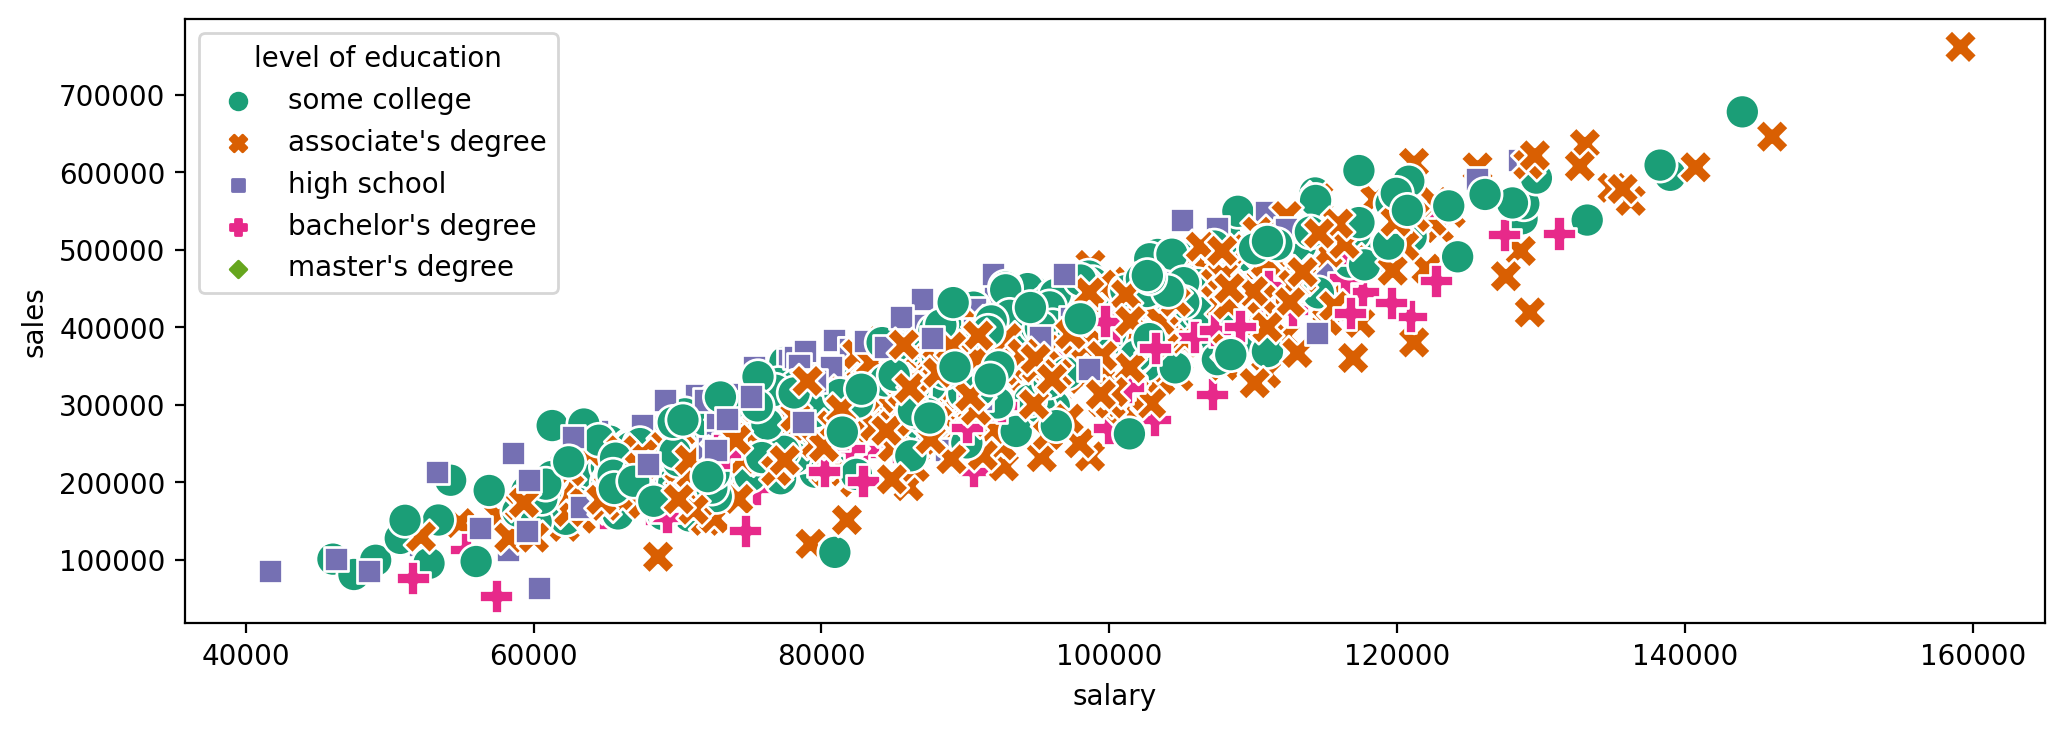

In [5]:
# Plot the correlation between salary and sales
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='salary', y='sales',data=df,
                hue='level of education',
                style="level of education",
                palette='Dark2',
                s=150,
                # size="work experience",
                # alpha=0.5,
                ); 
#plt.savefig("my_plot.jpg")


## Distribution Plots

**Distribution plots** display a single continuous feature and help visuallize properties such as deviation and average values.

There are 3 main distribution plot types:
* Rug plot
* Histogram
* KDE Plot

In [6]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### Rugplot - Univariate

One can think of rugplot as a 1D scatterplot.

Since y-axis in a rugplot is meaningless, the `height` parameter (percentage of y-axis from 0 to 1) is used for purposes of convenience.

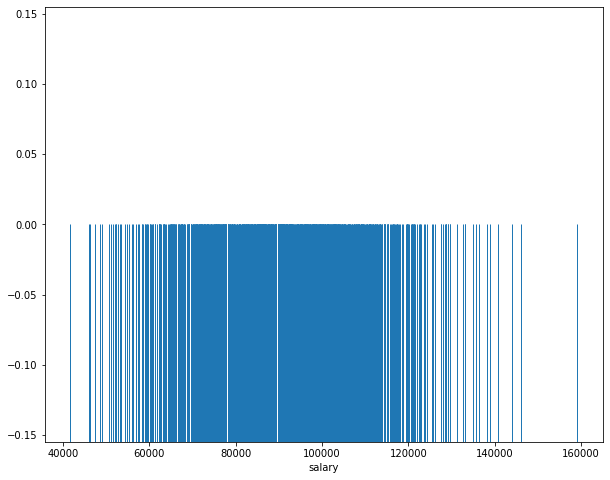

In [7]:
# Check distribution of salaries
plt.figure(figsize=(10,8))
sns.rugplot(x="salary", data=df, height=0.5);

### Histogram

`sns.displot`
`sns.histplot`

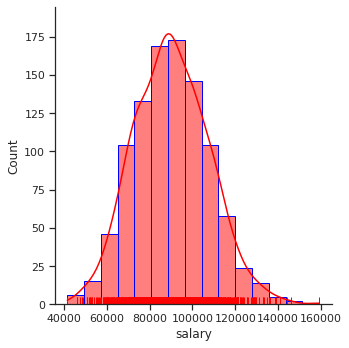

In [13]:
sns.set(style='ticks') #set style for background
#'darkgrid'/'whitegrid'/'white'/'dark'/'ticks'
# WILL SET STYLE FOR THE NOTEBOOK & INFLUENCE OTHER PLOTS
#
sns.displot(data=df, 
            x="salary",
            bins=15, #how many bins
            color="red",
            edgecolor="blue",
            kde=True,
            rug=True
            )

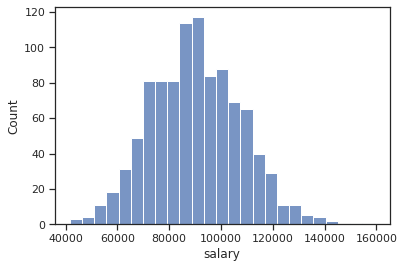

In [11]:
sns.histplot(data=df, x='salary')

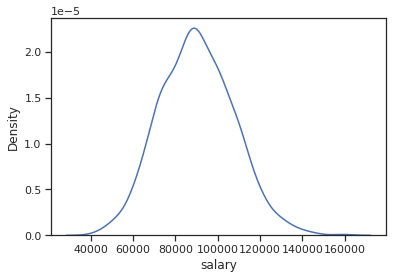

In [14]:
sns.kdeplot(data=df, x='salary')

In [15]:
np.random.seed(42)
sample_ages = np.random.randint(0,100,200)

In [16]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [17]:
sample_ages = pd.DataFrame(sample_ages, columns=['age'])

In [18]:
sample_ages.head()

,age
0,51
1,92
2,14
3,71
4,60


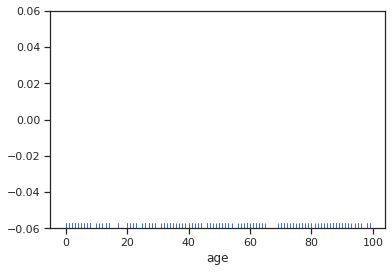

In [19]:
sns.rugplot(data=sample_ages, x='age')

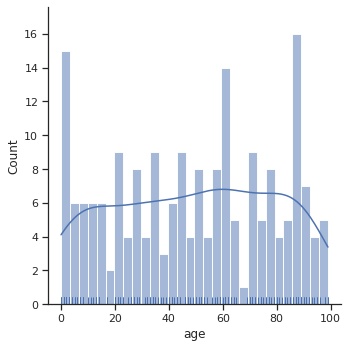

In [23]:
sns.displot(data=sample_ages, x='age', rug=True, bins=30, kde=True)

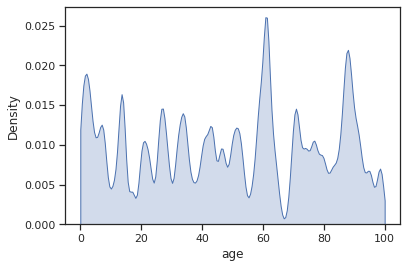

In [28]:
sns.kdeplot(data=sample_ages, x='age', 
            clip=[0,100], 
            bw_adjust=0.1, 
            shade=True)

## Categorical Plots

Display statistical metric per category, e.g. 
* what's mean value per category
* what's number of rows per category

It is a visualization equivalent of a groupby() call.

Two main types of plots:

**COUNT PLOT** : `countplot()` - count number of rows per category


**BARPLOTS** : `barplot()` - general form of displaying any chosen metric per category

In [29]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### Countplots

In [30]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

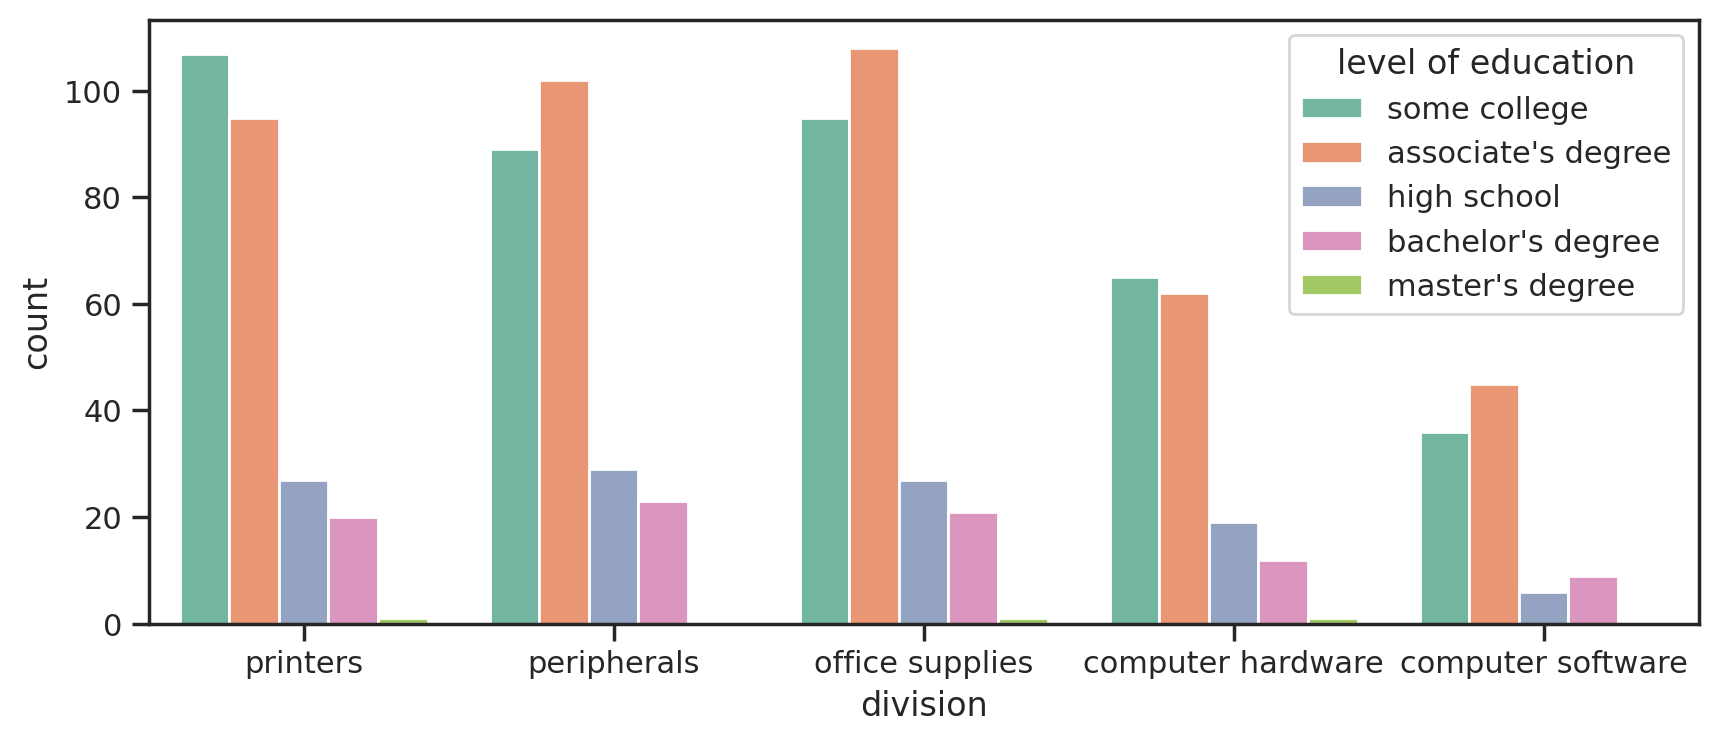

In [36]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='division',
              hue='level of education',
              palette='Set2')
#plt.ylim(0,1000) #ALWAYS CHECK Y AXIS - CAN BE USED TO DECEIVE

### Barplot

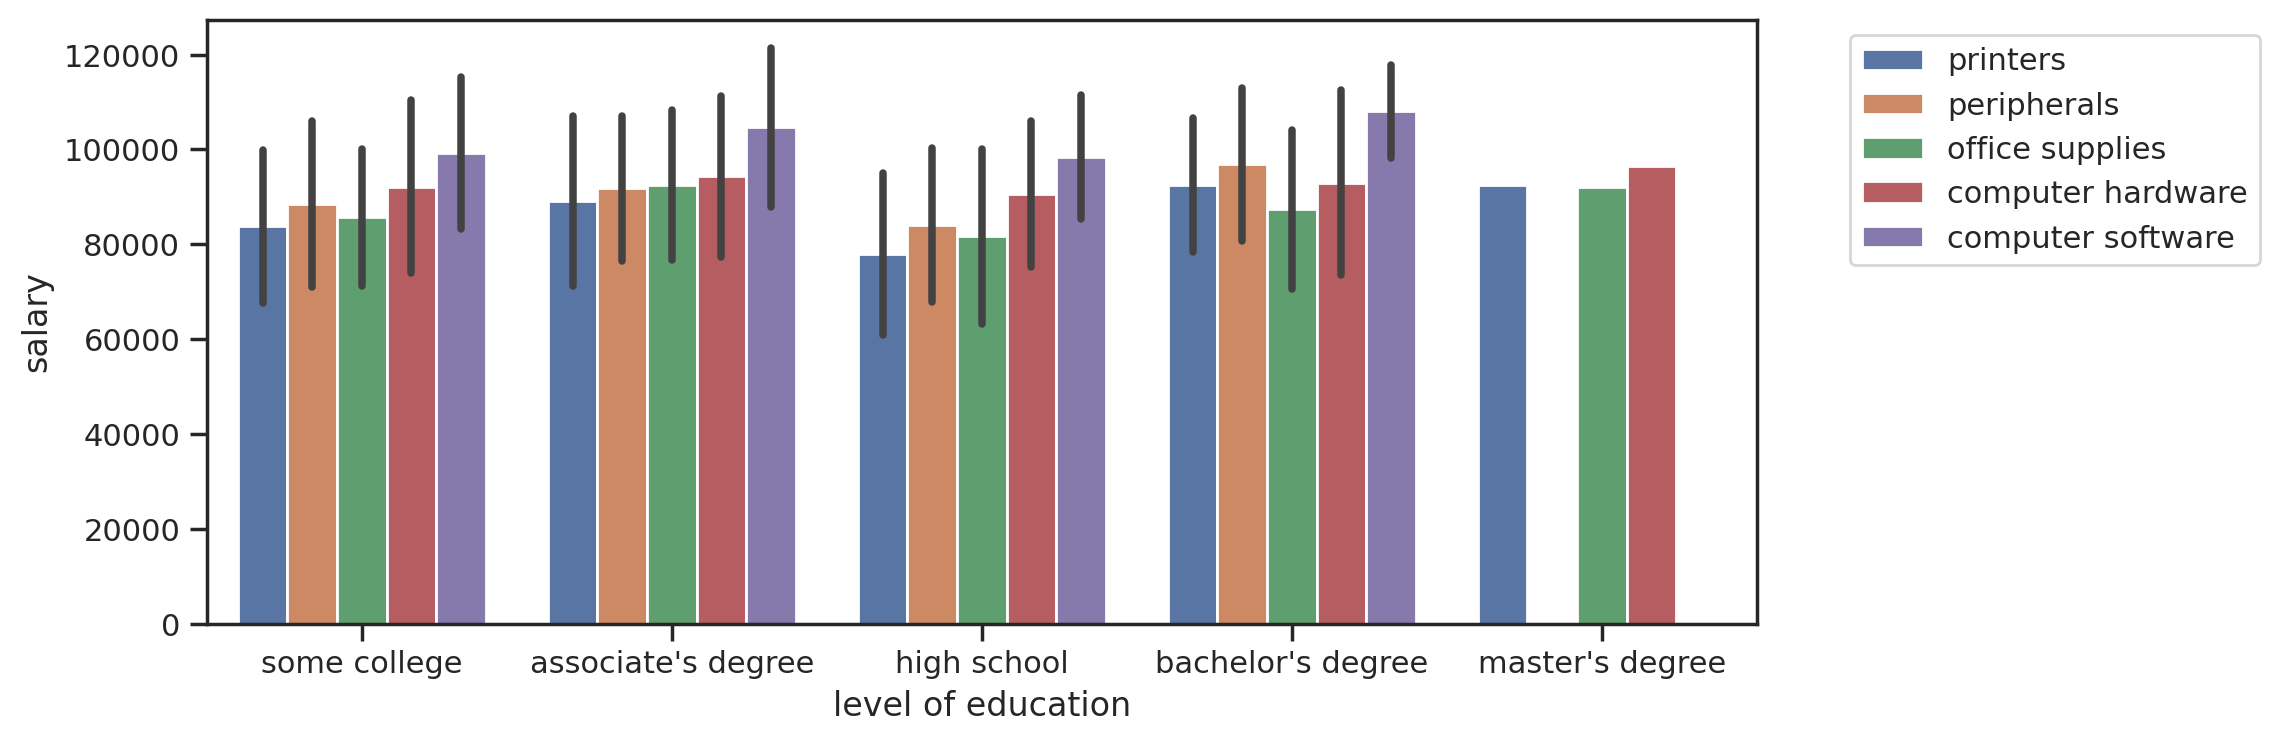

In [41]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x='level of education', y='salary',
            estimator=np.mean, #pass numpy function, default estimator is mean
            ci='sd', #confidence interval 'sd': standard deviation
            hue='division'
            )
plt.legend(bbox_to_anchor=(1.05, 1))

From the plot above it's not clear how many people actually have a masters (3 persons)

## Understanding Distribution within Categories

Distribution within Categories:
* Boxplot
* Violinplot
* Swarmplot
* Boxenplot (Letter-Value Plot)

In [42]:
!wget "https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/StudentsPerformance.csv"

--2021-10-09 07:07:41--  https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72036 (70K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  70.35K  --.-KB/s    in 0.01s   

2021-10-09 07:07:42 (5.47 MB/s) - ‘StudentsPerformance.csv’ saved [72036/72036]



In [43]:
students_performance_df = pd.read_csv("/content/StudentsPerformance.csv")

In [44]:
students_performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Boxplot

Displays the distribution of a **continuous variable** through the use of quartiles.

Quartiles separate the data into 4 equal number of data points:
* 25% - bottom quartile: below Q1
* 50th percentile (Q2) is the median (line inside the box)
* 25%-75% : the box

**NOTE: Doesn't show the count (how many points),, only distributions of the points.**

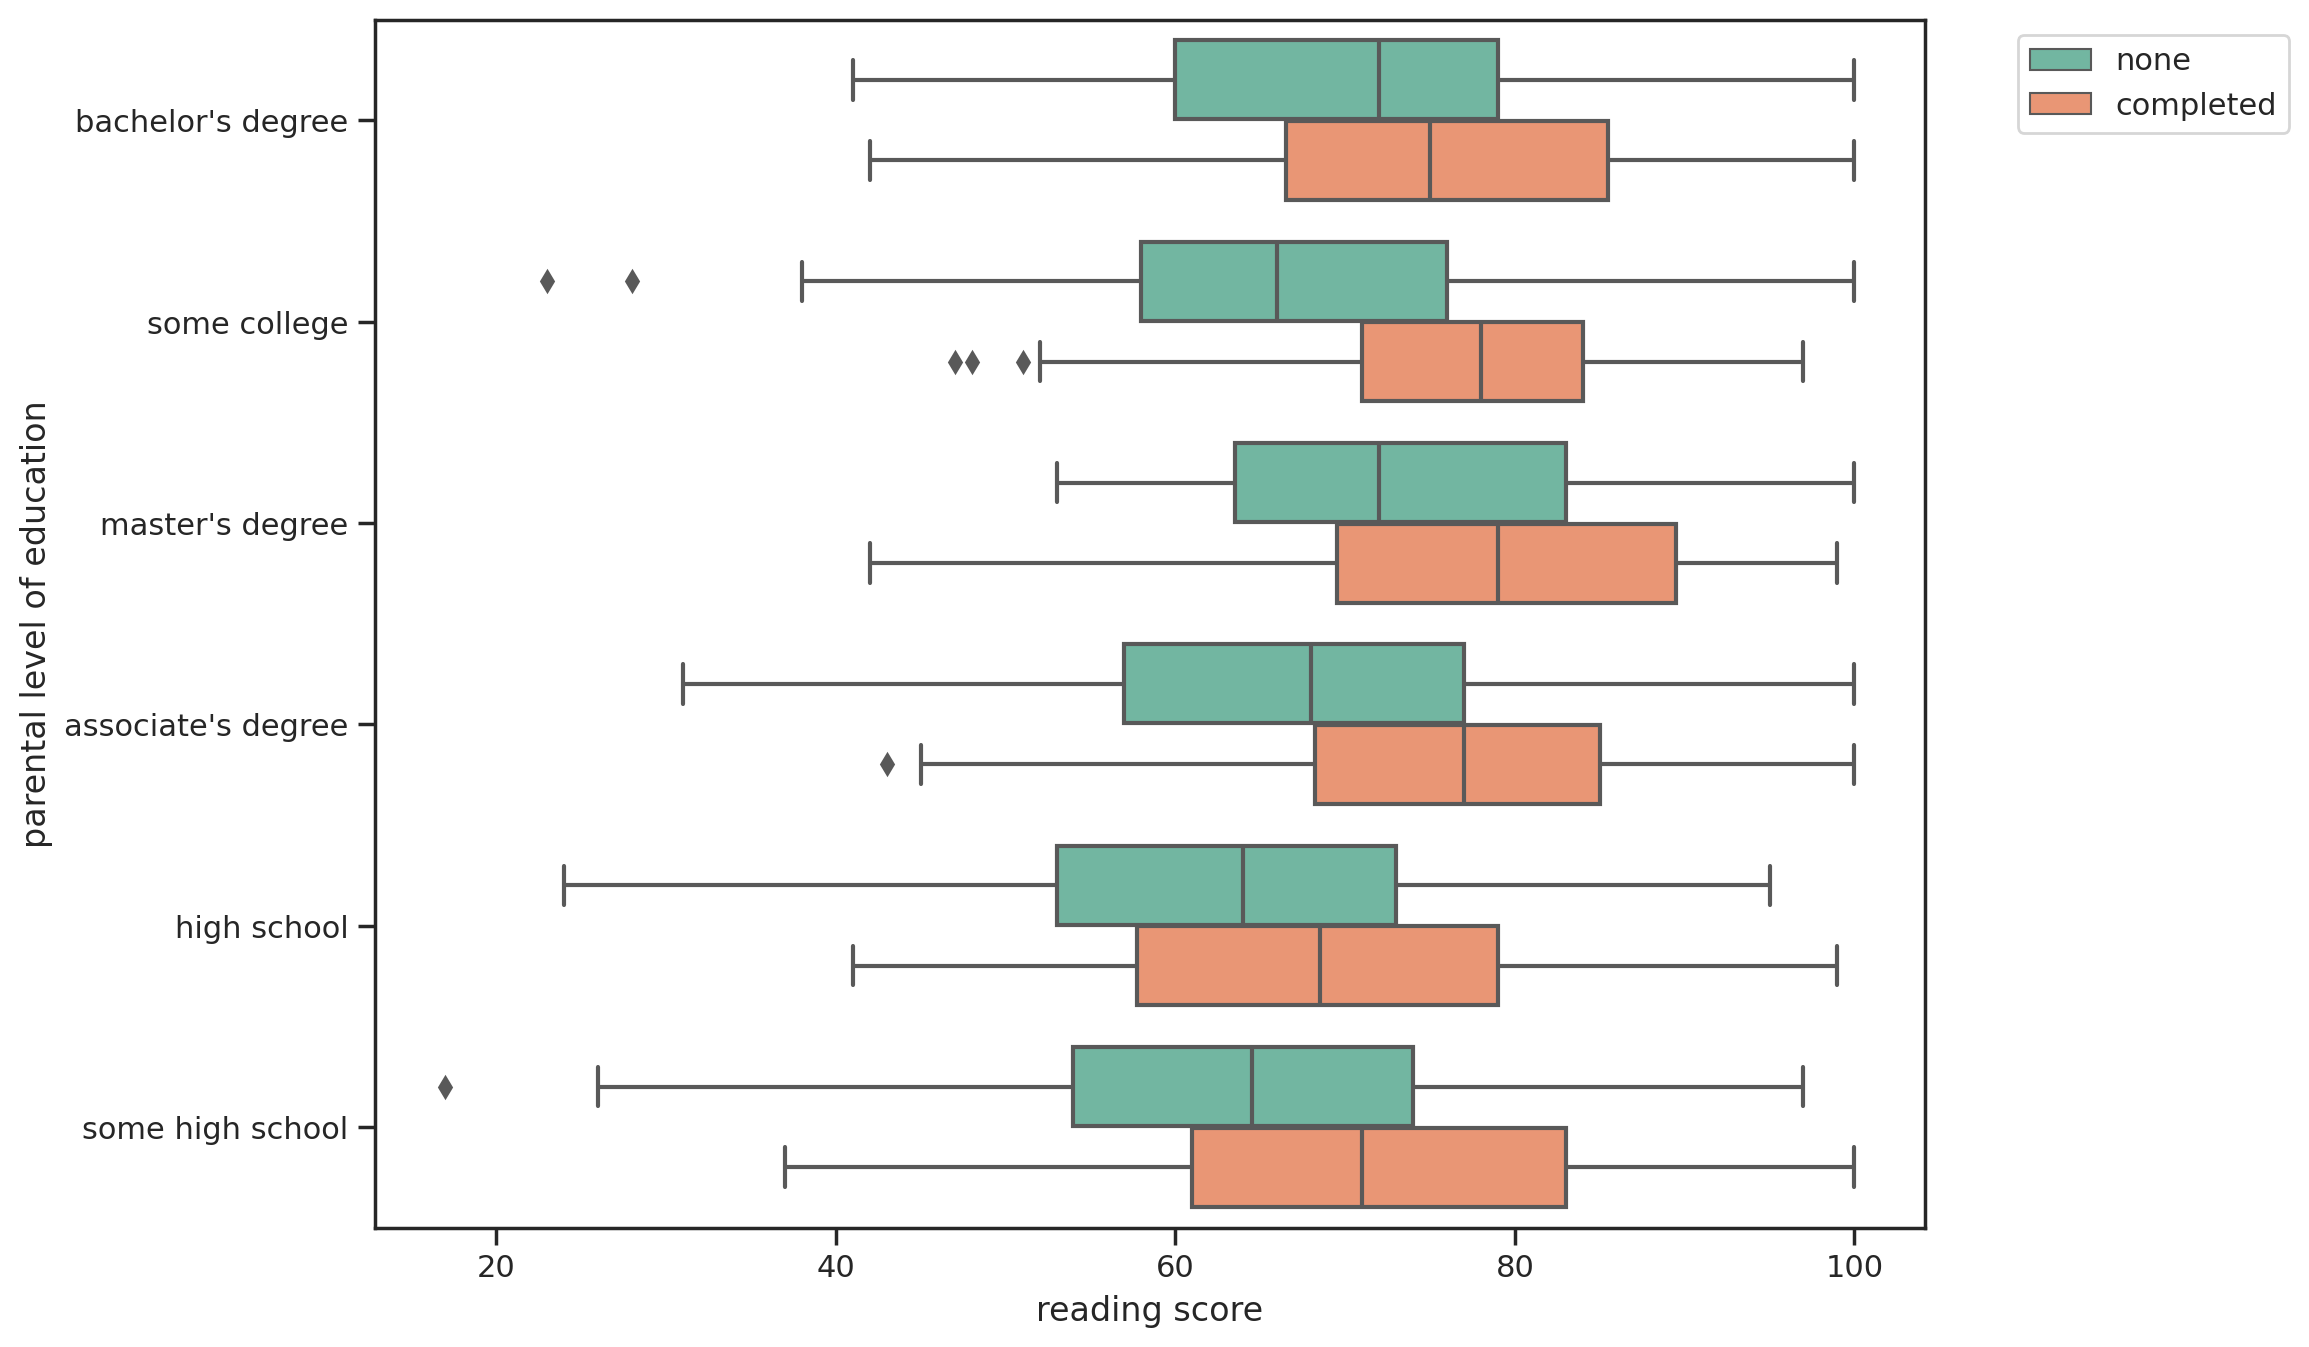

In [56]:
plt.figure(figsize=(10,8), dpi=200)
sns.boxplot(data=students_performance_df, 
            x='reading score',
            y='parental level of education',
            hue="test preparation course",
            palette='Set2')
plt.legend(bbox_to_anchor=(1.05,1))

### Violinplot

**Violinplot** is essentially a mirrored KDE plot.

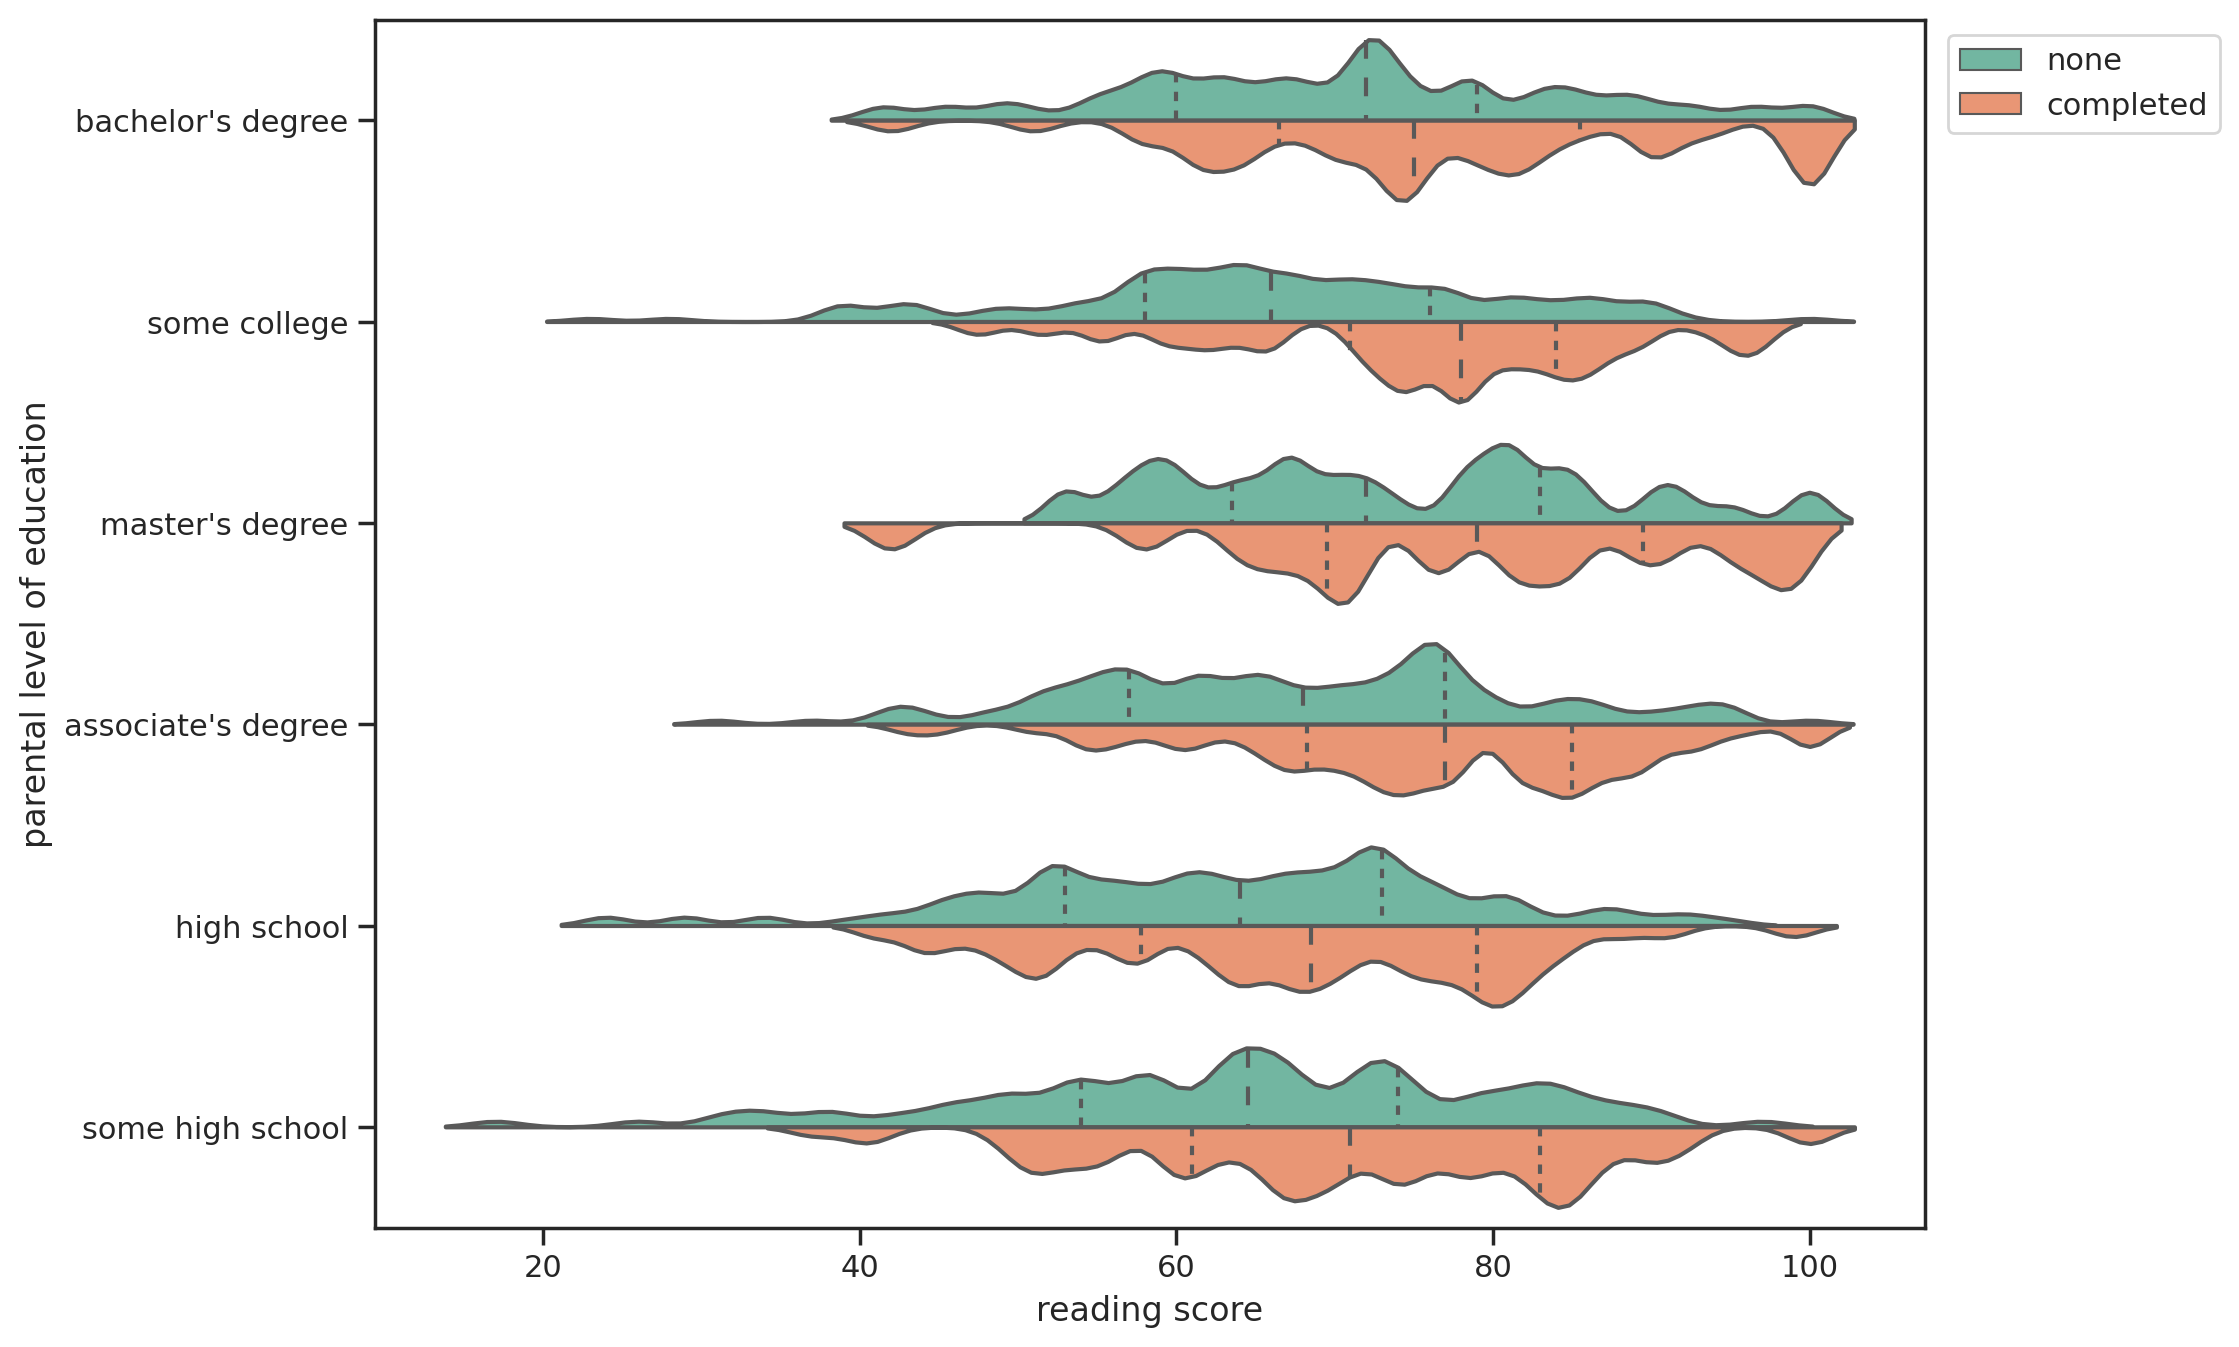

In [69]:
plt.figure(figsize=(10,8), dpi=200)
sns.violinplot(data=students_performance_df, 
            x='reading score',
            y='parental level of education',
            hue="test preparation course",
            split=True,
            inner='quartile', #None/ 'stick'
            bw=0.1,
            palette='Set2')
plt.legend(bbox_to_anchor=(1.2, 1))

###Swarmplot

Simply shows all the datapoints in the distribution.

For a large dataset it will not show all the points, but will display the general distribution of them.

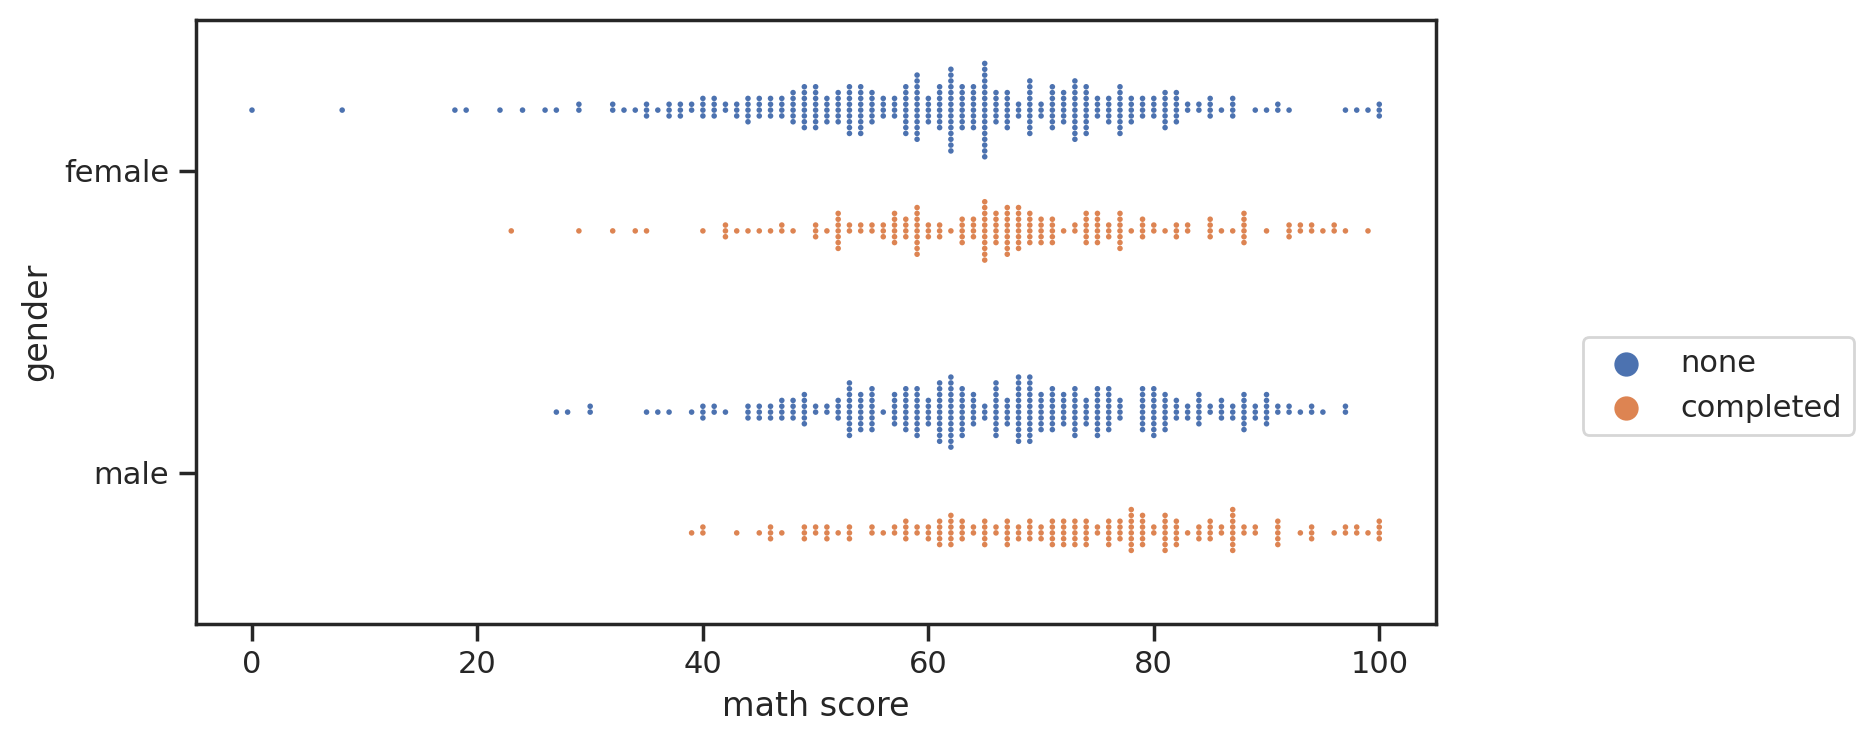

In [76]:
plt.figure(figsize=(8,4), dpi=200)
sns.swarmplot(data=students_performance_df, x='math score', 
              y='gender',
              hue='test preparation course',
              dodge=True, #splits up the plot by the hue category
              size=2)
plt.legend(bbox_to_anchor=(1.35, 0.5))

### Boxenplot (Letter-Value plot)

Designed as an expansion of the box plot. 

**Only use it if sure that the enduser is familiar with it**

Uses a system of letter values.

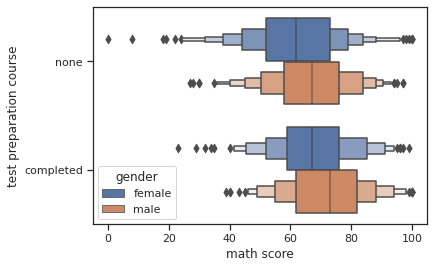

In [77]:
sns.boxenplot(data=students_performance_df,
              x='math score',
              y='test preparation course',
              hue='gender')

## Comparison plots

**Comparison plots** are essentially 2-dimensional versions of the plot we've learned.

Two main plots are:

* jointplot()
* pairplot()

### Jointplot

* Mapping histograms to each feature of a scatterplot to clarify the distributions within each feature.

* It is also possible to adjust the scatterplot to be a hex plot or a 2D kde plot.

In [78]:
students_performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


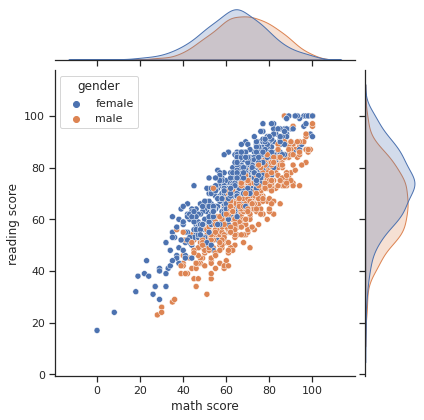

In [85]:
sns.jointplot(data=students_performance_df,
              x='math score',
              y='reading score',
              #kind='hex', #default is 'scatter' / 'hist' /'kde'
              #alpha=0.2,
              #shade=True, #when kind='kde'
              hue='gender', # when kind='scatter' 
              
              )

### Pairplot

* A quick way to compare all numerical columns in a DataFrame.

* It automatically creates a histogram for each column and a scatterplot comparison between all possible combinations of columns.

**NOTE:** Can be CPU and RAM intensive for large datasets.

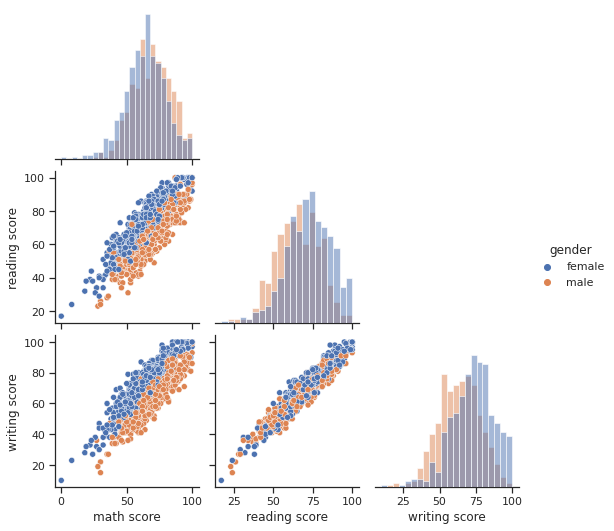

In [90]:
sns.pairplot(data=students_performance_df,
             hue='gender',
             diag_kind='hist',
             corner=True, # removes duplicates and only shows one corner
             )

## Grid Plots

Analogous to Matplotlib subplots() to automatically create a grid based off a categorical column.

Instead of passing in a specific number of cols / rows for subplots,
we can simply pass in the name of the column and seaborn will 
automatically map the subplot grids.

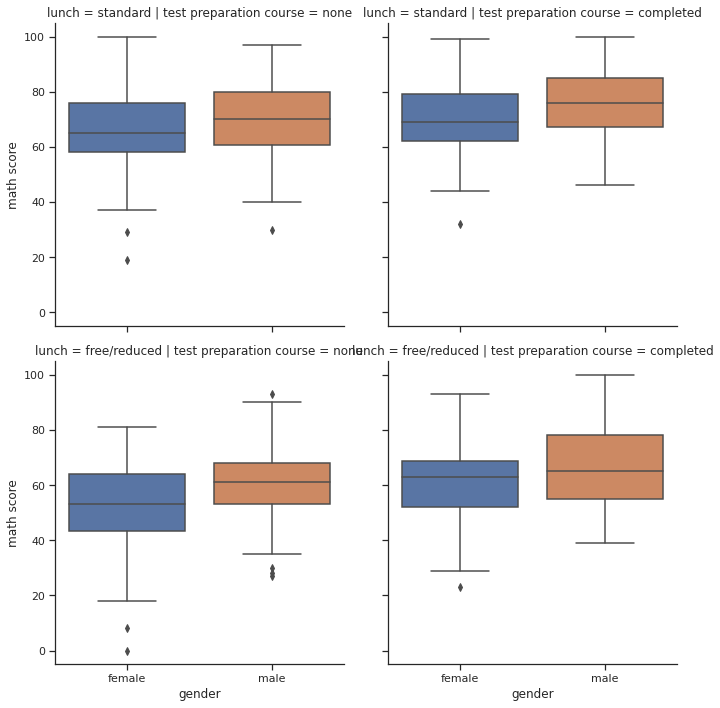

In [93]:
sns.catplot(data=students_performance_df,
            x='gender',
            y='math score',
            kind='box',
            row='lunch', # creates a separate row for each category of lunch
            col='test preparation course',
            
            )

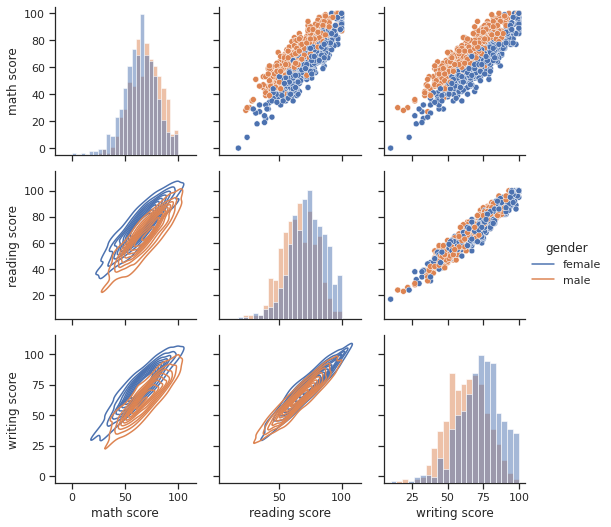

In [97]:
g = sns.PairGrid(students_performance_df, hue='gender')
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()